In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sb

In [2]:
auctions = pd.read_csv('auctions.csv.gzip', compression='gzip')
clicks = pd.read_csv('clicks.csv.gzip', compression='gzip')
events = pd.read_csv('events.csv.gzip', compression='gzip')
installs = pd.read_csv('installs.csv.gzip', compression='gzip')

/home/maximiliano/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (12,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Eliminando columnas innecesarias de 'clicks'

In [3]:
clicks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26351 entries, 0 to 26350
Data columns (total 20 columns):
advertiser_id      26351 non-null int64
action_id          0 non-null float64
source_id          26351 non-null int64
created            26351 non-null object
country_code       26351 non-null int64
latitude           26351 non-null float64
longitude          26351 non-null float64
wifi_connection    26351 non-null bool
carrier_id         26340 non-null float64
trans_id           26351 non-null object
os_minor           26339 non-null float64
agent_device       3243 non-null float64
os_major           26339 non-null float64
specs_brand        26351 non-null int64
brand              6235 non-null float64
timeToClick        22977 non-null float64
touchX             23011 non-null float64
touchY             23011 non-null float64
ref_type           26351 non-null int64
ref_hash           26351 non-null int64
dtypes: bool(1), float64(11), int64(6), object(2)
memory usage: 3.8+ MB


In [3]:
# Drop de columnas 
# action_id: por ser toda nula
# agent_device y brand: por tener pocos valores no nulos (y ademas la mayoria los valores no nulos de agent_device contienen NaN en brand)
# country_code: Todos son el mismo
# wifi_connection: Todas los valores son false
clicks.drop(['action_id', 'agent_device', 'brand', 'country_code', 'wifi_connection'], axis=1, inplace=True)

# Eliminando columnas de 'installs'

In [6]:
installs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3412 entries, 0 to 3411
Data columns (total 18 columns):
created               3412 non-null object
application_id        3412 non-null int64
ref_type              3412 non-null int64
ref_hash              3412 non-null int64
click_hash            0 non-null float64
attributed            3412 non-null bool
implicit              3412 non-null bool
device_countrycode    3412 non-null int64
device_brand          1047 non-null float64
device_model          3411 non-null float64
session_user_agent    3364 non-null object
user_agent            1729 non-null object
event_uuid            865 non-null object
kind                  865 non-null object
wifi                  1729 non-null object
trans_id              6 non-null object
ip_address            3412 non-null int64
device_language       3378 non-null float64
dtypes: bool(2), float64(4), int64(5), object(7)
memory usage: 433.2+ KB


In [4]:
# Drop de columnas
# click_hash: por tener valores nulos
# trans_id: por tener pocos valores (ninguno de ellos se relaciona con trans_id de events)
installs.drop(['click_hash'], axis=1, inplace=True)

# Eliminando columnas de 'events'

In [8]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2494423 entries, 0 to 2494422
Data columns (total 22 columns):
date                  object
event_id              int64
ref_type              int64
ref_hash              int64
application_id        int64
attributed            bool
device_countrycode    int64
device_os_version     float64
device_brand          float64
device_model          float64
device_city           float64
session_user_agent    float64
trans_id              object
user_agent            float64
event_uuid            object
carrier               float64
kind                  float64
device_os             float64
wifi                  object
connection_type       object
ip_address            int64
device_language       float64
dtypes: bool(1), float64(10), int64(6), object(5)
memory usage: 402.0+ MB


## Eliminando columnas innecesarias de auctions

In [3]:
auctions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19571319 entries, 0 to 19571318
Data columns (total 7 columns):
auction_type_id    float64
country            int64
date               object
device_id          int64
platform           int64
ref_type_id        int64
source_id          int64
dtypes: float64(1), int64(5), object(1)
memory usage: 1.0+ GB


In [4]:
# Drop de columnas
# country: todos los registros son del mismo pais
# auction_type_id: todos los valores son NaN
auctions.drop(['country', 'auction_type_id'], axis=1, inplace=True)

## Analisis de los datos

### Auctions 

In [5]:
#Agregando columnas para categorizar por fecha *solo hay datos del 5 al 13 de Marzo de 2019 -> No sirve de mucho clasificar por dia de la semana porque
#4 dias van a tener mas datos que otros

#auctions['date_year'] = auctions.date.dt.year
#auctions['date_month'] = auctions.date.dt.month
#auctions['date_week_day'] = auctions.date.dt.dayofweek

#Convierto en datetime la columna date
auctions['date'] = pd.to_datetime(auctions['date'])

auctions['date_hour'] = auctions.date.dt.hour
auctions['date_month_day'] = auctions.date.dt.day
auctions['date_day'] = auctions.date.dt.date

#Convierto la columna de platform sabiendo que android = 1, ios = 2
auctions['platform'] = auctions['platform'].map({1: 'android', 2: 'ios'})

#### Reparticion de plataformas en las subastas

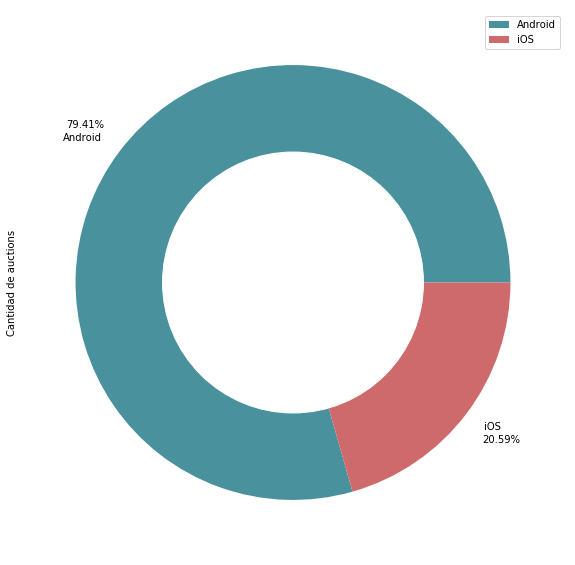

In [72]:
auctions_by_platform = auctions.groupby('platform')['date'].count().reset_index()
auctions_by_platform.columns = ['Plataforma', 'Cantidad de auctions']
auctions_by_platform.plot.pie(y='Cantidad de auctions', figsize=(10, 10), labels=['Android', 'iOS'], colors=['#4a919e', '#ce6a6b'], autopct='%.2f%%', label=None, pctdistance=1.2)
circle = plt.pyplot.Circle((0,0), 0.6, color='white')
p = plt.pyplot.gcf()
p.gca().add_artist(circle)
plt.pyplot.show()

#### Subastas por dia clasificadas por plataforma

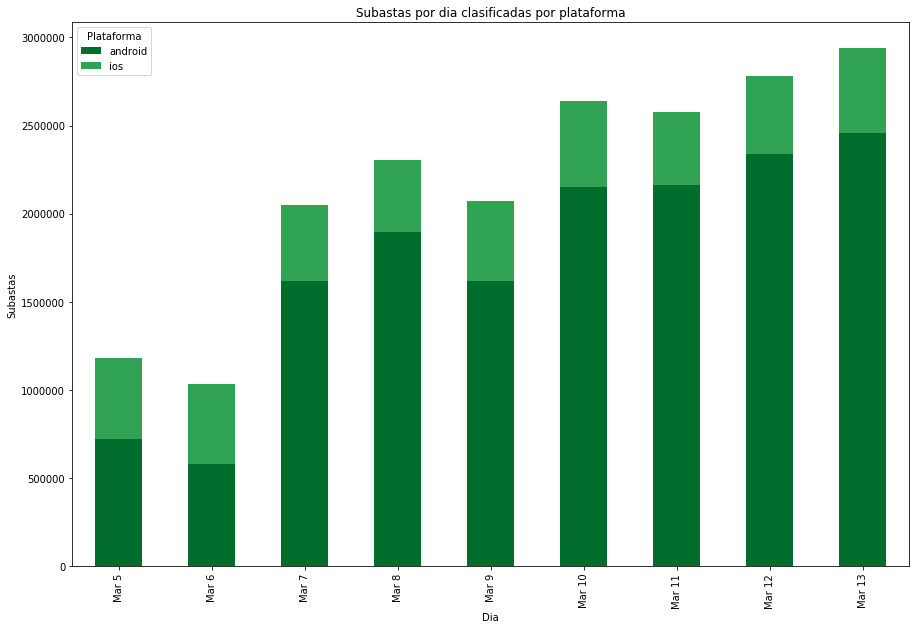

In [45]:
pivot_date_platform = auctions.pivot_table(index='date_day', columns='platform', values='device_id', aggfunc='count')
date_platform_plot = pivot_date_platform.plot.bar(stacked=True, color=["#006D2C", "#31A354"], figsize=(15,10), title='Subastas por dia clasificadas por plataforma')
date_platform_plot.set_xlabel("Dia")
date_platform_plot.set_ylabel("Subastas")
date_platform_plot.set_xticklabels(['Mar 5', 'Mar 6', 'Mar 7', 'Mar 8', 'Mar 9', 'Mar 10', 'Mar 11', 'Mar 12', 'Mar 13'])
date_platform_plot.legend(title="Plataforma")

#### Subastas por dia clasificadas por origen

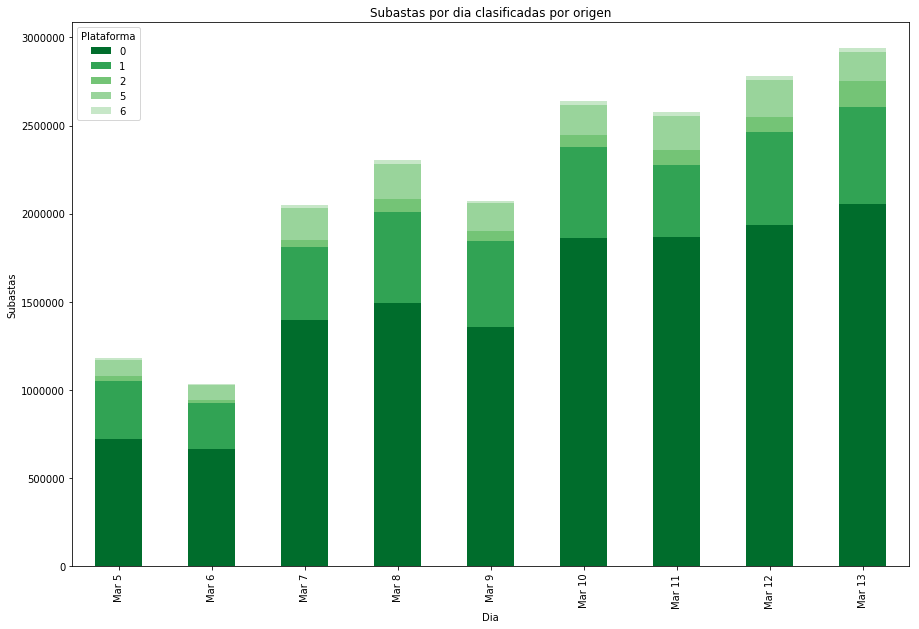

In [9]:
pivot_date_source = auctions.pivot_table(index='date_day', columns='source_id', values='device_id', aggfunc='count')
date_source_plot = pivot_date_source.plot.bar(stacked=True, color=["#006D2C", "#31A354", "#74C476", "#99d49b", "#c7e7c8"], figsize=(15,10), title='Subastas por dia clasificadas por origen')
date_source_plot.set_xlabel("Dia")
date_source_plot.set_ylabel("Subastas")
date_source_plot.set_xticklabels(['Mar 5', 'Mar 6', 'Mar 7', 'Mar 8', 'Mar 9', 'Mar 10', 'Mar 11', 'Mar 12', 'Mar 13'])
date_source_plot.legend(title="Plataforma")

#### Subastas totales por origen

Text(0, 0.5, 'Origen')

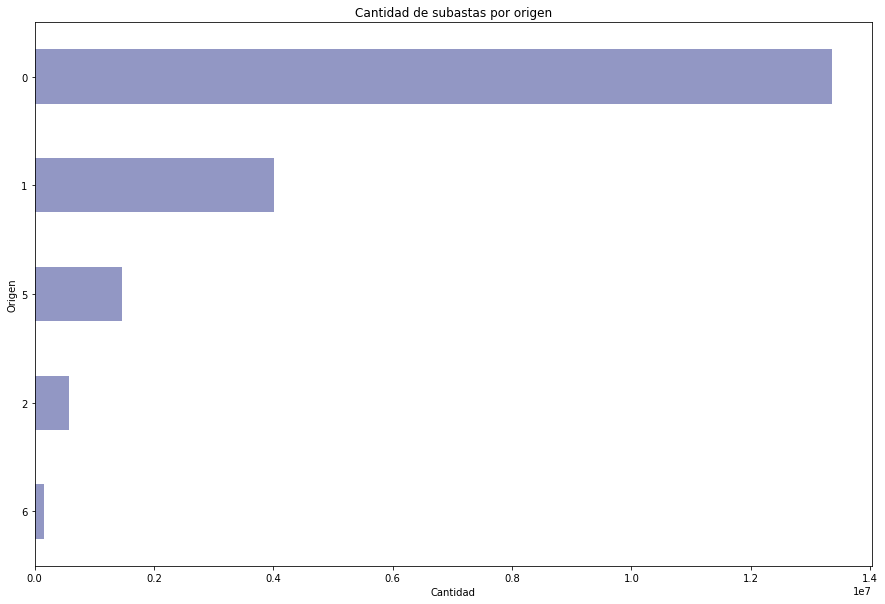

In [20]:
auctions_by_source_plot = auctions.groupby('source_id')['date'].count().reset_index(name='count').sort_values(['count'], ascending=True).set_index("source_id")\
        .plot.barh(color='#9297c4', figsize=(15,10), title="Cantidad de subastas por origen", legend=None)
auctions_by_source_plot.set_xlabel("Cantidad")
auctions_by_source_plot.set_ylabel("Origen")

#### Top 10 dispositivos con mas subastas realizadas

Text(0, 0.5, 'Dispositivo')

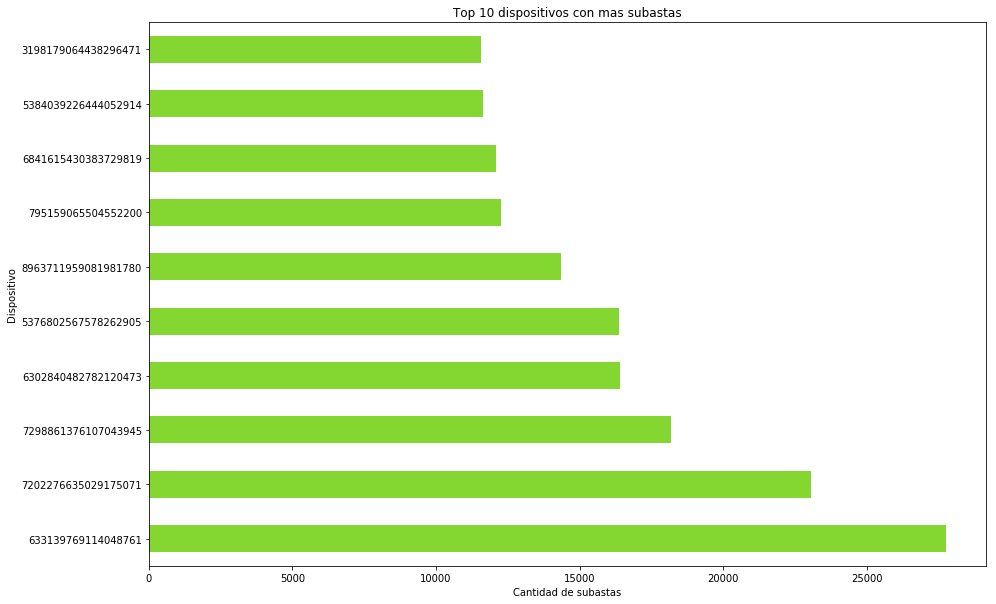

In [21]:
top_10_auction_devices_plot = auctions.groupby(['device_id'])['date'].count().sort_values(ascending=False).head(10).plot.barh(color='#84D731', figsize=(15,10), title="Top 10 dispositivos con mas subastas")
top_10_auction_devices_plot.set_xlabel("Cantidad de subastas")
top_10_auction_devices_plot.set_ylabel("Dispositivo")

In [15]:
auctions.loc[auctions['device_id'] == 633139769114048761, :].groupby('date_month_day')['date_hour'].count()
#auctions.loc[:, ['device_id', 'date']].groupby('device_id').count().iloc[0])

date_month_day
5     2255
6      224
7     1877
8     1865
9     2054
10    5777
11    4829
12    4625
13    4256
Name: date_hour, dtype: int64

### Clicks  

In [6]:
clicks.head(5)

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
0,2,NaN,4,2019-03-06T22:42:12.755Z,6333597102633388268,1.205689,1.070234,False,1.0,iGgClCM9exiHF4K31g94XmvHEBSLKIY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,1.563,0.905,0.078,1891515180541284343,1904083516767779093
1,0,NaN,0,2019-03-08T10:24:30.641Z,6333597102633388268,1.218924,1.071209,False,4.0,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,3.025219e+18,NaN,1.774085e+18,392184377613098015,NaN,NaN,NaN,NaN,1891515180541284343,3086509764961796666
2,0,NaN,0,2019-03-08T15:24:16.069Z,6333597102633388268,1.205689,1.070234,False,6.0,vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,5.975656e+18,NaN,3.072849e+18,392184377613098015,NaN,NaN,0.946,0.473,1891515180541284343,6958163894863846647
3,2,NaN,3,2019-03-06T03:08:51.543Z,6333597102633388268,1.205689,1.070234,False,45.0,YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,19.013,0.035,0.431,1891515180541284343,4368617728156436525
4,2,NaN,3,2019-03-06T03:32:55.570Z,6333597102633388268,1.205689,1.070234,False,45.0,X5XTOcYQovkl6yadYdAD7xioVGU9jiY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,28.110,0.054,0.423,1891515180541284343,4368617728156436525


In [6]:
#Convierto en datetime la columna date
clicks['created'] = pd.to_datetime(clicks['created'])
# Agregando columnas especificas para la hora (nuevamente los valores son del 5 a 13 de Marzo de 2019)
clicks['date_hour'] = clicks.created.dt.hour
clicks['date_month_day'] = clicks.created.dt.day
clicks['date_day'] = clicks.created.dt.date

#### Top 10 mobile carriers

Text(0, 0.5, 'Cantidad')

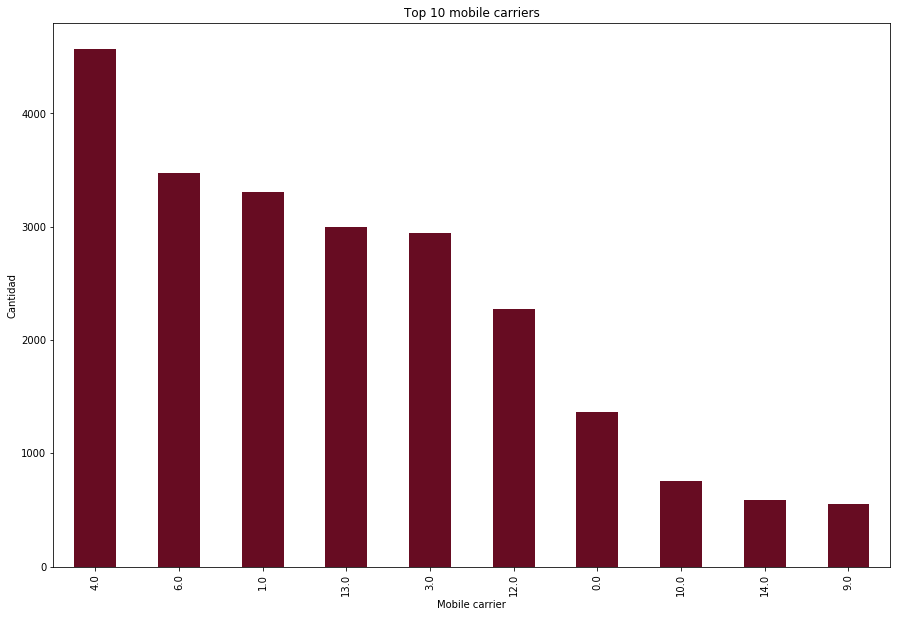

In [7]:
clicks_top_10_carriers_plot = clicks['carrier_id'].value_counts().head(10).plot.bar(color='#670c22', figsize=(15,10), title="Top 10 mobile carriers")
clicks_top_10_carriers_plot.set_xlabel("Mobile carrier")
clicks_top_10_carriers_plot.set_ylabel("Cantidad")

#### Promedio de tiempo de click por advertiser_id (cliente de jampp)

Text(0.5, 0, 'Tiempo promedio de click')

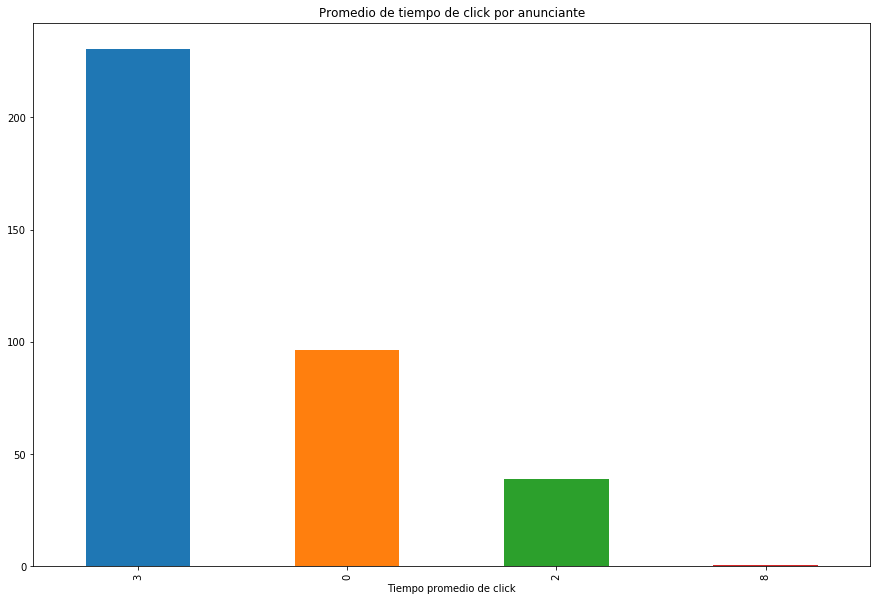

In [16]:
timetoclick_mean_by_advertiser_id_plot = clicks.groupby('advertiser_id')['timeToClick'].mean().dropna().sort_values(ascending=False).plot.bar(figsize=(15, 10), title="Promedio de tiempo de click por anunciante")
timetoclick_mean_by_advertiser_id_plot.set_xlabel("Anunciante (Cliente de Jampp)")
timetoclick_mean_by_advertiser_id_plot.set_xlabel("Tiempo promedio de click")

In [15]:
clicks.loc[clicks['advertiser_id'] == 8, :]

,advertiser_id,source_id,created,latitude,longitude,carrier_id,trans_id,os_minor,os_major,specs_brand,timeToClick,touchX,touchY,ref_type,ref_hash,date_hour,date_month_day,date_day,clickSpeed
8862,8,1,2019-03-06 03:02:40.352,1.209638,1.064208,28.0,1co_FpMFHEw8U6VtIDiVHraI7UcgBWI,6.768137e+18,3.072849e+18,2733035977666442898,0.695,0.257,0.988,1891515180541284343,8983455136472355809,3,6,2019-03-06,veryfast


In [7]:
# Agrego columnas para categorizar el tiempo de click en base a los datos
def timeToClickClassifier(time):
    if time < 3:
        return 'veryfast' #muy rapido
    elif time < 9:
        return 'fast' #rapido
    elif time < 18:
        return 'normal' #normal
    elif time < 35:
        return 'slow' #lento
    else: 
        return 'veryslow' #muy lento
clicks['clickSpeed'] = clicks['timeToClick'].map(lambda x: timeToClickClassifier(x))

#### Velocidad de los clicks

In [34]:
clicks['clickSpeed'].value_counts()

veryslow    10775
veryfast     5879
fast         4869
normal       2946
slow         1882
Name: clickSpeed, dtype: int64

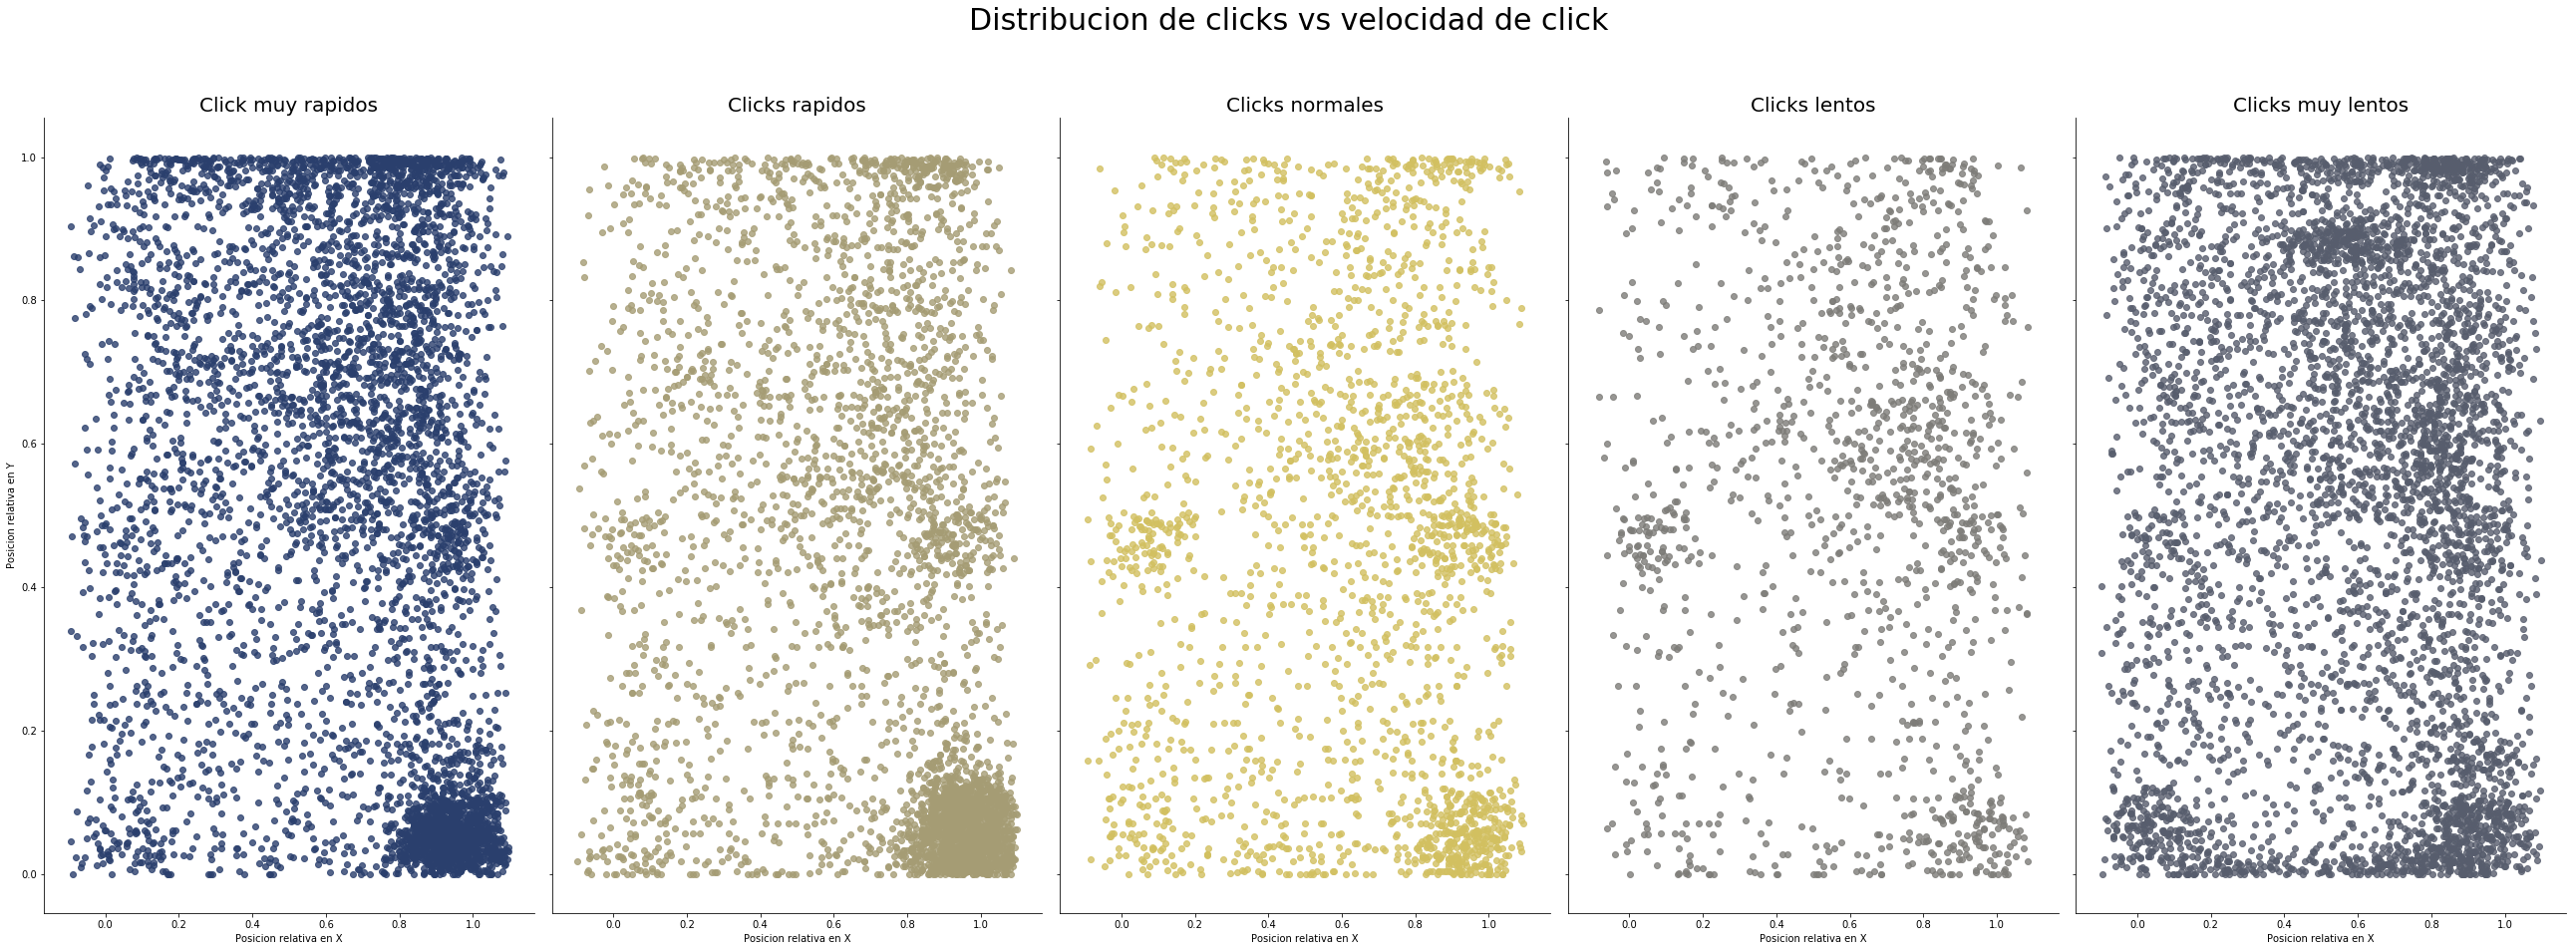

In [67]:
clicks_position_scatter_plot = sb.lmplot(x='touchX', y='touchY', data=clicks.loc[(clicks['touchY']<= 1.0) & clicks.touchX.notnull() & clicks.touchY.notnull(), ['touchX', 'touchY', 'clickSpeed']], height=12, aspect=.6, \
                                         hue='clickSpeed', col='clickSpeed', col_order=['veryfast', 'fast', 'normal', 'slow', 'veryslow'], x_jitter=.1, fit_reg=False, \
                                         palette="cividis")
clicks_position_scatter_plot.fig.suptitle(t="Distribucion de clicks vs velocidad de click", fontsize=30, y=1.1)
clicks_position_scatter_plot.set_axis_labels(x_var="Posicion relativa en X", y_var="Posicion relativa en Y")
clicks_position_scatter_plot.fig.axes[0].set_title("Click muy rapidos", fontsize=20)
clicks_position_scatter_plot.fig.axes[1].set_title("Clicks rapidos", fontsize=20)
clicks_position_scatter_plot.fig.axes[2].set_title("Clicks normales", fontsize=20)
clicks_position_scatter_plot.fig.axes[3].set_title("Clicks lentos", fontsize=20)
clicks_position_scatter_plot.fig.axes[4].set_title("Clicks muy lentos", fontsize=20)
clicks_position_scatter_plot

#### Mapa de calor basado en la posicion del click

In [19]:
#Categorizo los valores
clicks['touchXSQ'] = clicks['touchX'].map(lambda x: "{:.1f}".format(x))
clicks['touchYSQ'] = clicks['touchY'].map(lambda x: "{:.1f}".format(x))

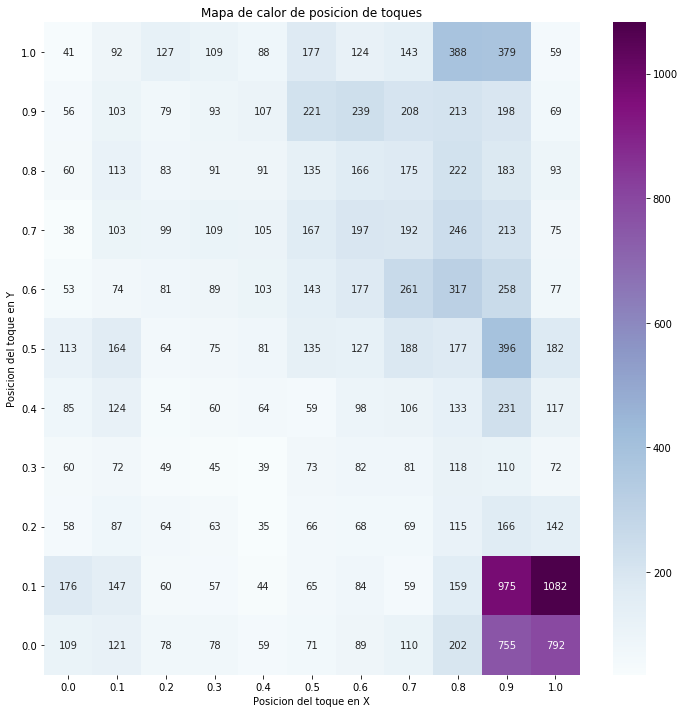

In [42]:
pivotTable = clicks.loc[(clicks['touchY'] <= 1.0) & clicks.touchXSQ.notnull() & clicks.touchYSQ.notnull(), :].pivot_table(index='touchYSQ', columns='touchXSQ', values='created', aggfunc='size', fill_value=0)
pivotTable.sort_index(level=0, ascending=False, inplace=True)
fig, ax = plt.pyplot.subplots(figsize=(12,12))
clicks_heatmap = sb.heatmap(pivotTable, annot=True, ax=ax, cmap='BuPu', fmt='g')
clicks_heatmap.set_title("Mapa de calor de posicion de toques")
clicks_heatmap.set_xlabel("Posicion del toque en X")
clicks_heatmap.set_ylabel("Posicion del toque en Y")
plt.pyplot.yticks(rotation=0)
plt.pyplot.show()

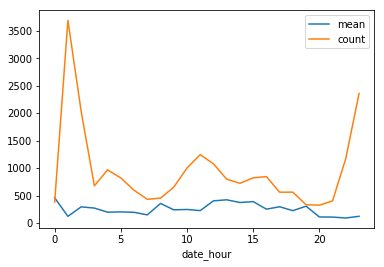

In [14]:
#clicks.groupby(['date_day', 'date_hour']).agg({'timeToClick' : ['count', 'mean']}).fillna(0).reset_index()#.groupby('date_hour')#.agg({'timeToClick' : ['count', 'mean']})#.plot.bar()
#clicks_mean_by_day_pivotTable = clicks.pivot_table(index='date_day', columns='date_hour', values='timeToClick', aggfunc='mean', fill_value=0)
#clicks_mean_by_day_pivotTable
timeToClick_by_day_group = clicks.groupby('date_hour')['timeToClick'].agg(['mean', 'count']).fillna(0)#.reset_index()
#plt.pyplot.scatter(timeToClick_by_day_group['date_hour'], timeToClick_by_day_group['count'], s=timeToClick_by_day_group['mean'], alpha=0.5, c="Red")
timeToClick_by_day_group.plot.line()

#### Heat map cantidad de clicks por hora y dia

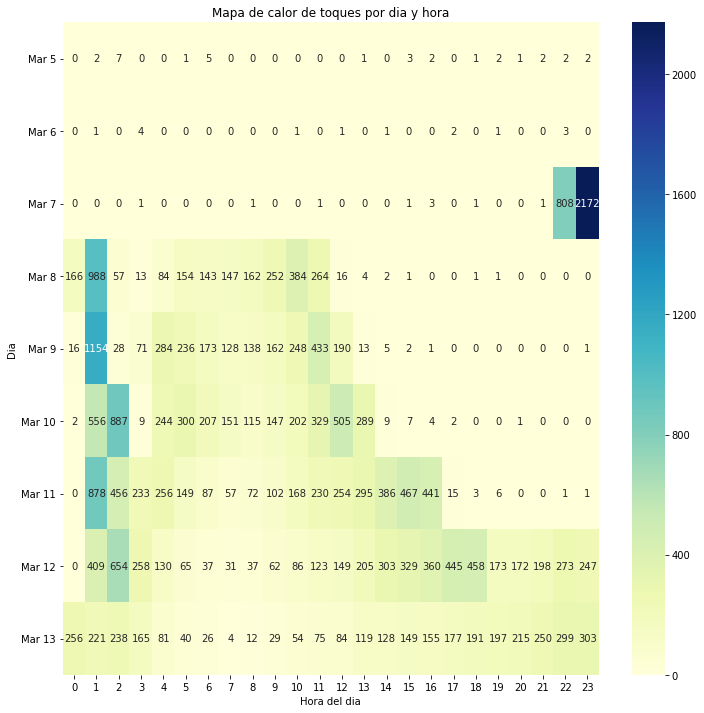

In [41]:
pivotClicksByDayHour = clicks.pivot_table(index='date_month_day', columns='date_hour', values='created', aggfunc='size', fill_value=0)
pivotClicksByDayHour.sort_index(level=0, ascending=True, inplace=True)
fig, ax = plt.pyplot.subplots(figsize=(12,12))
clicks_heatmap = sb.heatmap(pivotClicksByDayHour, annot=True, ax=ax, cmap='YlGnBu', fmt='g')
clicks_heatmap.set_title("Mapa de calor de toques por dia y hora")
clicks_heatmap.set_xlabel("Hora del dia")
clicks_heatmap.set_ylabel("Dia")
clicks_heatmap.set_yticklabels(['Mar 5', 'Mar 6', 'Mar 7', 'Mar 8', 'Mar 9', 'Mar 10', 'Mar 11', 'Mar 12', 'Mar 13'])
plt.pyplot.yticks(rotation=0)
plt.pyplot.show()

In [13]:
clicks.loc[(clicks['date_month_day'] == 7) & (clicks['date_hour'] >= 22), :]['ref_hash'].value_counts().sort_values(ascending=False)

1244272413279716745    6
8805031220726784134    4
8977688089403584330    4
4189977525013368108    4
6625134759534725044    4
4063522808706112974    4
9220738447140691123    4
6841615430383729819    4
7671595809370812411    3
925803901826809324     3
6675837760917040624    3
255889990391478961     3
7302339911184450570    3
2096591512896662112    3
8933293053272245139    3
4037806929298651647    3
2176397662722855713    3
2636361770374394026    3
6993407966039984250    3
623330835965202988     3
8633762769430553389    3
6698962417639803438    3
7582955077272111400    3
5598746720853450301    3
5209341542942249640    3
9059515393194537527    3
5895548390768522926    3
1576635054493846969    3
3839630079151711848    3
4959007845335887107    3
                      ..
6645827359391242911    1
7397951900907619157    1
6763385754373535919    1
5217242882393014286    1
8541981660063796471    1
4768176190736745484    1
1360619548394952       1
2186312023052506348    1
2079986898562147326    1


# Cruces

In [23]:
#clicks['ref_hash'].isin(events[''])
print(clicks.size, events.size, auctions.size, installs.size)

500669 54877306 156570552 58004


In [13]:
#events_auctions = pd.merge(events, auctions, left_on='ref_hash', right_on='device_id', how='inner')
#events_auctions.size
events.describe()

,event_id,ref_type,ref_hash,application_id,device_countrycode,device_os_version,device_brand,device_model,device_city,session_user_agent,user_agent,carrier,kind,device_os,ip_address,device_language
count,2.494423e+06,2.494423e+06,2.494423e+06,2.494423e+06,2.494423e+06,1.022066e+06,1.164963e+06,2.406456e+06,6.146980e+05,2.482637e+06,1.391527e+06,6.164340e+05,2.489324e+06,6.576670e+05,2.494423e+06,2.406604e+06
mean,9.970445e+01,1.794164e+18,4.641486e+18,9.910934e+01,6.333597e+18,4.986001e+18,1.633891e+18,4.478847e+18,3.832628e+18,4.719312e+18,4.856492e+18,1.470186e+18,5.364362e+18,7.251101e+18,4.620786e+18,5.865447e+18
std,1.070903e+02,1.707944e+17,2.660724e+18,5.780986e+01,1.024000e+03,2.394834e+18,1.626674e+18,2.718014e+18,8.166911e+17,1.769561e+18,2.487552e+18,2.575962e+18,2.242979e+18,5.247066e+17,2.672746e+18,2.281192e+18
min,0.000000e+00,1.494519e+18,1.633675e+14,0.000000e+00,6.333597e+18,1.004084e+16,7.949737e+16,9.530216e+14,4.355428e+16,5.527631e+15,5.072532e+15,2.248157e+17,7.758270e+16,2.748831e+18,5.287755e+12,2.025809e+16
25%,2.200000e+01,1.891515e+18,2.326142e+18,6.300000e+01,6.333597e+18,4.353750e+18,3.083059e+17,2.331947e+18,3.800080e+18,3.819516e+18,2.723465e+18,2.248157e+17,4.647949e+18,6.941825e+18,2.333410e+18,3.301378e+18
50%,3.100000e+01,1.891515e+18,4.688964e+18,6.600000e+01,6.333597e+18,4.353750e+18,5.137992e+17,4.430579e+18,3.800080e+18,3.819516e+18,5.022936e+18,2.248157e+17,5.500848e+18,7.531669e+18,4.541498e+18,6.804428e+18
75%,1.610000e+02,1.891515e+18,6.927594e+18,1.450000e+02,6.333597e+18,7.391844e+18,2.987569e+18,6.882415e+18,3.800080e+18,7.164321e+18,6.840860e+18,1.179587e+18,6.169667e+18,7.531669e+18,7.044307e+18,6.977049e+18
max,7.120000e+02,1.891515e+18,9.223316e+18,3.220000e+02,6.333597e+18,9.135482e+18,9.178260e+18,9.222450e+18,9.205669e+18,9.220949e+18,9.223277e+18,9.182957e+18,9.215473e+18,7.531669e+18,9.223367e+18,9.187882e+18


In [16]:
events['ref_hash'].isin(installs['ref_hash']).value_counts()

False    2451949
True       42474
Name: ref_hash, dtype: int64

In [17]:
events_installs = pd.merge(events, installs, on='ref_hash', how='inner')
events_installs.size

2019966

In [19]:
events_installs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53157 entries, 0 to 53156
Data columns (total 38 columns):
date                    53157 non-null object
event_id                53157 non-null int64
ref_type_x              53157 non-null int64
ref_hash                53157 non-null int64
application_id_x        53157 non-null int64
attributed_x            53157 non-null bool
device_countrycode_x    53157 non-null int64
device_os_version       17173 non-null float64
device_brand_x          23908 non-null float64
device_model_x          50056 non-null float64
device_city             11915 non-null float64
session_user_agent_x    53044 non-null float64
trans_id_x              21 non-null object
user_agent_x            32916 non-null float64
event_uuid_x            53048 non-null object
carrier                 11976 non-null float64
kind_x                  53048 non-null float64
device_os               16602 non-null float64
wifi_x                  32629 non-null object
connection_type   

In [33]:
events_installs['device_language_x'].value_counts()

9.028383e+18    20957
3.301378e+18    14530
4.621024e+18     5985
6.977049e+18     2835
4.077062e+17     2005
2.822843e+17     1520
1.526421e+18      547
6.804428e+18      485
4.060930e+18      357
1.193279e+18      171
6.035180e+18      165
3.695787e+17      131
1.101539e+17       79
6.535228e+18       48
7.774316e+18       46
3.177265e+18       43
5.846217e+18       42
3.095856e+18       25
5.241241e+17       14
3.074904e+18        8
4.594650e+18        8
6.846873e+18        7
5.061642e+18        7
1.686906e+18        6
6.782349e+18        6
6.569908e+18        6
2.488366e+18        4
4.340981e+18        3
7.045130e+18        3
6.111820e+18        3
2.061937e+18        3
5.794427e+17        2
3.544544e+18        2
3.686855e+18        2
4.073835e+18        1
3.714591e+18        1
3.908582e+18        1
Name: device_language_x, dtype: int64